# Project

##  Part A: IMDb Movie Review Sentiment Analysis

### Task 1 – Data Exploration and Preprocessing

#### Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('Imdb.xlsx')

In [3]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [8]:
print (df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


#### Step 2: Basic EDA (Trends, Missing Values, Outliers, Review Length)

In [10]:
print(df.isnull().sum())   # Check missing values


review       0
sentiment    0
dtype: int64


In [12]:
# Review length analysis

df['Review_Length'] = df['review'].apply(lambda x: len(str(x).split()))
df['Review_Length'].describe()

count    50000.000000
mean       231.137900
std        171.339334
min          1.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: Review_Length, dtype: float64

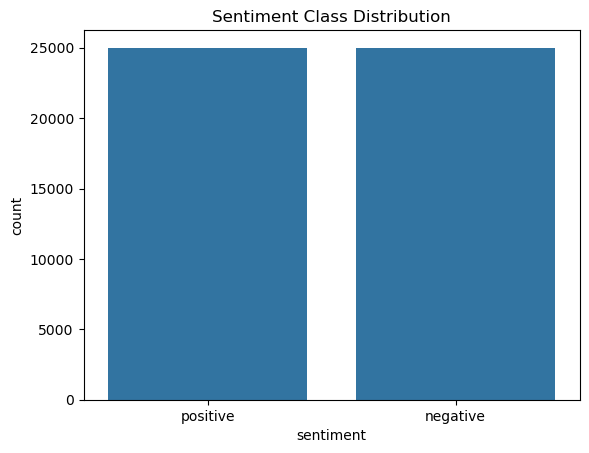

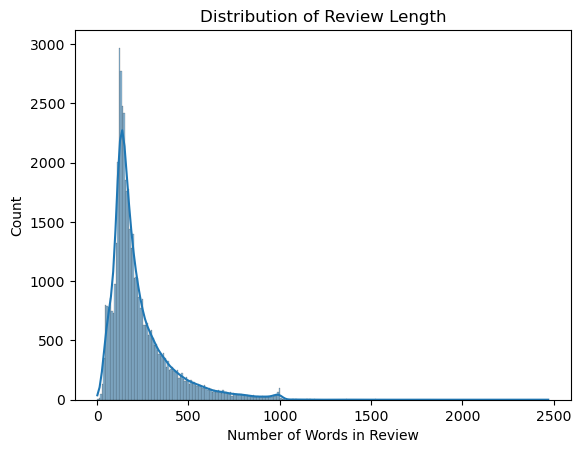

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

sns.histplot(df['Review_Length'], kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Number of Words in Review")
plt.show()

#### Step 3: Text Preprocessing


import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

In [31]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [32]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)               # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)             # Remove punctuation
    text = re.sub(r'\d+', '', text)                 # Remove numbers
    tokens = text.split()                           # Simpler than word_tokenize()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [33]:
df['Clean_Review'] = df['review'].apply(preprocess_text)


#### Step 4: Vectorization – Bag of Words & TF-IDF

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [35]:
cv = CountVectorizer(max_features=5000)
X_bow = cv.fit_transform(df['Clean_Review']).toarray()

In [36]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['Clean_Review']).toarray()

In [38]:
y = df['sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)


### Task 2 – Feature Engineering

#### Step 1: Add Textual Features


In [40]:
df['Word_Count'] = df['Clean_Review'].apply(lambda x: len(x.split()))
df['Char_Count'] = df['Clean_Review'].apply(lambda x: len(x.replace(" ", "")))
df['Avg_Word_Length'] = df['Char_Count'] / df['Word_Count']
df[['Word_Count', 'Char_Count', 'Avg_Word_Length']].describe()

,Word_Count,Char_Count,Avg_Word_Length
count,50000.000000,50000.000000,50000.000000
mean,118.658120,702.625940,5.871359
std,89.375333,544.134072,0.456130
min,1.000000,5.000000,4.187500
25%,64.000000,366.000000,5.566265
50%,88.000000,516.000000,5.857143
75%,144.000000,855.000000,6.158860
max,1420.000000,7763.000000,19.310345


#### Step 2: TF-IDF Vectorization


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [42]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['Clean_Review']).toarray()

In [44]:
y = df['sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)


### Task 2 – Model Development

#### Step 1: Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


#### Step 2: Build & Train Models

##### 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [49]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



##### 2. Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB


In [51]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [52]:
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



##### 3. Support Vector Machine (SVM)

In [53]:
from sklearn.svm import LinearSVC


In [54]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [55]:
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Task 4 – Model Evaluation.

#### Step 1: Import Evaluation Tools

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#### Step 2: Evaluate All Models

In [58]:
# Logistic Regression
lr_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-score': f1_score(y_test, y_pred_lr),
    'ROC AUC': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}

# Naive Bayes
nb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1-score': f1_score(y_test, y_pred_nb),
    'ROC AUC': roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
}

# SVM 
svm_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-score': f1_score(y_test, y_pred_svm),
    'ROC AUC': roc_auc_score(y_test, svm.decision_function(X_test))
}


#### Step 3: Combining in a Summary Table

In [59]:
model_eval_df = pd.DataFrame([lr_metrics, nb_metrics, svm_metrics],
                             index=['Logistic Regression', 'Naive Bayes', 'SVM'])

print(model_eval_df.round(4))


                     Accuracy  Precision  Recall  F1-score  ROC AUC
Logistic Regression    0.8854     0.8764  0.8994    0.8878   0.9565
Naive Bayes            0.8490     0.8475  0.8539    0.8507   0.9276
SVM                    0.8784     0.8724  0.8887    0.8805   0.9520


#### ROC Curve

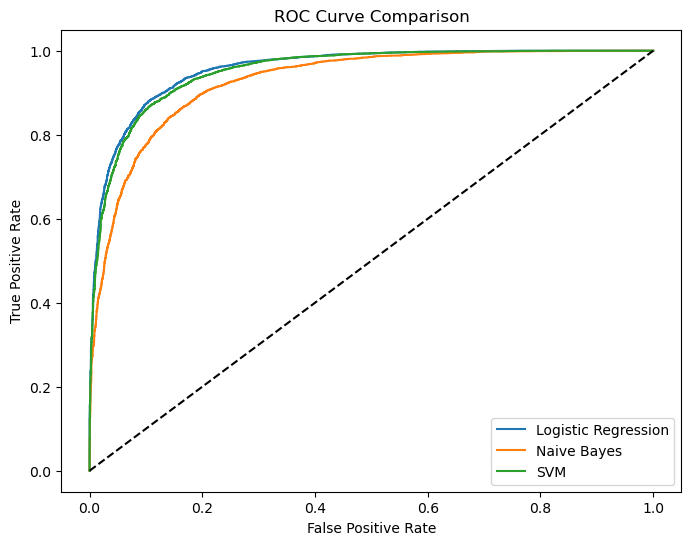

In [61]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


#### IMDb Movie Review Sentiment Analysis – Final Summary
##### In this project, I worked on analyzing IMDb movie reviews to predict whether each review was positive or negative. The goal was to use natural language processing and machine learning to build an accurate sentiment classifier.

##### The dataset contained user reviews along with sentiment labels. I began by cleaning the text — converting it to lowercase, removing punctuation, numbers, stopwords, and lemmatizing the words to their base form. I also extracted basic features like word count and average word length to better understand the data.

##### To turn the text into a format that machine learning models could understand, I used TF-IDF vectorization, which gives importance to meaningful words in the reviews. I then trained three models: Logistic Regression, Naive Bayes, and Support Vector Machine (SVM).

##### All three models performed well, but Logistic Regression gave the best accuracy and overall scores. The project showed how effective text preprocessing and TF-IDF can be for sentiment analysis. This approach can be applied to many other areas like product reviews or social media analysis.

##### Overall, the project gave me practical experience with NLP and model building for real-world text data.